In [1]:
from Scripts import *

### Extract Symbol (i.e Spade/Heart etc...) from bboxed cards

In [52]:
data_loader = DataLoader()
extractor = Extractor()

image, label = data_loader[2, 1]

In [53]:
label

{'P1': 'JC', 'P2': '2D', 'P3': '4S', 'P4': 'JD', 'D': 4}

In [47]:
# extract dealer, cards and figure suits
dealer, cards, figure_suits = extractor(image)

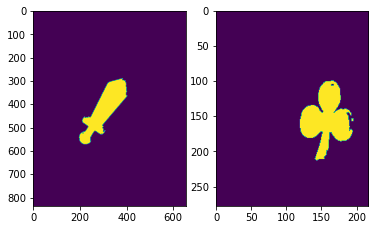

In [48]:
# usage
fig,ax = plt.subplots(1,2)

ax[0].imshow(figure_suits[1]['figure'])
ax[1].imshow(figure_suits[1]['suit'])

Apply on all cropped out images from extract main

<b> Separating for symbols, experiments? </b>

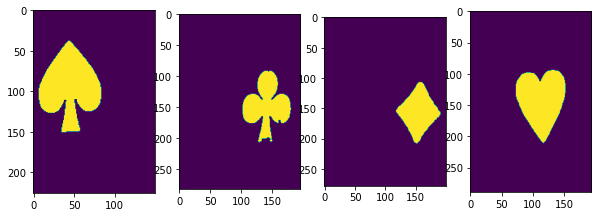

In [26]:
# template to extract feature and compare

spade = cv2.imread('./media/spade.jpg',0)
clover = cv2.imread('./media/clover.jpg',0)
diamond = cv2.imread('./media/diamond.jpg',0)
heart = cv2.imread('./media/heart.jpg',0)

fig,ax = plt.subplots(1,4,figsize=(10,5))

ax[0].imshow(spade)
ax[1].imshow(clover)
ax[2].imshow(diamond)
ax[3].imshow(heart)

suits = [spade,clover,diamond,heart]

In [36]:
# templates = [spade, clover, diamond, heart]

features = [cv2.HuMoments(cv2.moments(suit))[:2] for suit in suits]
def classify(mask, templates):
    
    # mask is suit image from extractor 
    features = cv2.HuMoments(cv2.moments(mask))[:2]
    return np.argmin([(center[0]-features[0])**2 + (center[1]-features[1])**2
                      for center in templates])

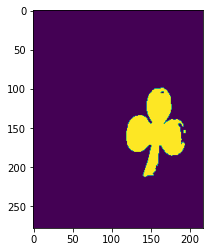

In [49]:
plt.imshow(figure_suits[1]['suit'].astype(np.uint8)*255)

In [57]:
classify(figure_suits[1]['suit'].astype(np.uint8)*255,features)

1

<b> Test classifier accuracy on full dataset </b>

In [56]:
data_loader = DataLoader()
extractor = Extractor()

for game in range(1, 7+1):
    for round_ in range(1, 13+1):
        image, _ = data_loader[game, round_]

In [ ]:
# def compare_ratio(img1,img2):
#     a,b = img1.shape
#     c,d = img2.shape
#     return (max(a,b) / min(a,b)) < (max(c,d) / min(c,d))

# def dense(comps,labels_im):
#     # get connected compo with enough pixel count 
#     thresh = np.mean(comps[1:,1])
#     candidate = np.asarray([comp for comp in comps if comp[1] > thresh])[:,0][1:] # remove background
    
#     # compute 
#     ret = []
#     for obj in candidate:
        
#         coords = np.where((labels_im)==obj)
#         xmin,xmax = coords[0][0], coords[0][-1]
#         ymin,ymax = coords[1][0], coords[1][-1]
    
#         # arbitrary value
#         if abs(xmax-xmin) < 350 and abs(ymax-ymin) < 350: 
#             ret.append(obj)
#     return ret

# def extract_symbol(img):
#     # input gotta be colored and we take green channel
#     threshed = (img[:,:,1] < 100) * 255 
#     num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(
#                                                 threshed.astype(np.uint8), 4)
    
#     # sort by pixel count of a component
#     possible = np.array(sorted([(idx,val) for idx,val 
#                  in enumerate(stats[:,-1])],
#                 key=lambda x:x[1],reverse=True))
    
#     # get compact and large enough connected components
#     r1,r2,r3 = dense(possible, labels_im)[:3]
    
#     figure = (labels_im == r1) # represent largest shape and so the number
#     sym1 = (labels_im == r2) # represent symbols
#     sym2 = (labels_im == r3)
    
#     # bboxes
#     x1,x2,y1,y2 = get_rectanglecoords(figure)
#     x1s,x2s,y1s,y2s = get_rectanglecoords(sym1)
#     x1w,x2w,y1w,y2w = get_rectanglecoords(sym2)
#     return figure[y1:y2,x1:x2], sym1[y1s:y2s,x1s:x2s], sym2[y1w:y2w,x1w:x2w]